In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt

Завантаження та підготовка даних

In [3]:
batch_size = 128
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transform),
    batch_size=batch_size, shuffle=True)

Визначення архітектури варіаційного автокодувальника

In [4]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Ініціалізація моделі та втрати

In [5]:
model = ConvAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Навчання моделі

In [7]:
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        images, _ = data
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

Epoch [1/10], Loss: 0.0420
Epoch [2/10], Loss: 0.0294
Epoch [3/10], Loss: 0.0290
Epoch [4/10], Loss: 0.0289
Epoch [5/10], Loss: 0.0288
Epoch [6/10], Loss: 0.0287
Epoch [7/10], Loss: 0.0287
Epoch [8/10], Loss: 0.0287
Epoch [9/10], Loss: 0.0286
Epoch [10/10], Loss: 0.0286


Графік функції втрат

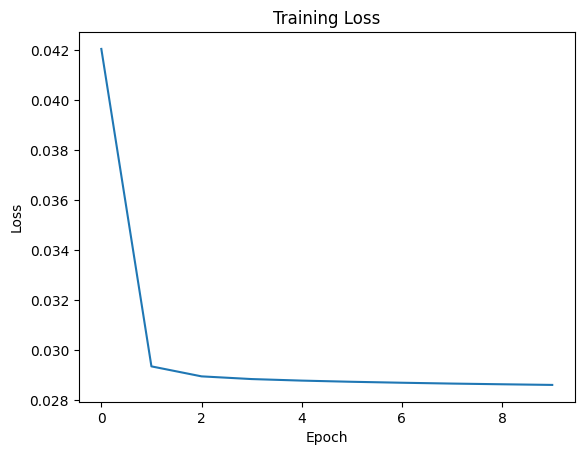

In [8]:
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()